In [179]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn
from sys import getsizeof as gso
from scipy.io import loadmat

56 40 112
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
800984 800040 800112


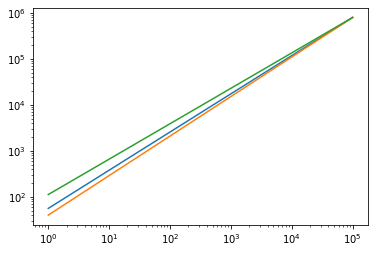

In [180]:
"""a) Memory size
The 'sys.getsizeof()' method can evaluate the size of any variable, i.e. Number of bytes required by python to store it in memory.
Find out the memory size of a list structure and plot them:

list of 'int' and 'float' types with lengths in the range from 1 to 100000. Create a list of random int and floats in the given range.
tuple of 'int' and 'float' types with length in a range from 1 to 100000.
numpy array of int and float type in same element range (1-100000).

Compare the results by visualizing the results!"""
listIntFloat = [] # 56
tupleIntFloat = () # 40
npIntFloat = np.array(listIntFloat) # 112
print(gso(listIntFloat), gso(tupleIntFloat), gso(npIntFloat))

for i in range(100000):
    temp = random.random()
    listIntFloat.append(temp)
    tupleIntFloat = tupleIntFloat + (temp,)
    if i%10000 == 0: print(i)
npIntFloat = np.array(listIntFloat)
print(gso(listIntFloat), gso(tupleIntFloat), gso(npIntFloat))
len(tupleIntFloat)

plt.plot((1,100000),(56, gso(listIntFloat)))
plt.plot((1,100000),(40, gso(tupleIntFloat)))
plt.plot((1,100000),(112, gso(npIntFloat)))
plt.xscale("log")
plt.yscale("log")
plt.show()

"""b) Performance
As we already know, Numpy is a Python fundamental package used for efficient manipulations and operations on High-level mathematical functions, Multi-dimensional arrays, Linear algebra, Fourier Transformations, Random Number Capabilities, etc.
Let's compare the effectiveness of numpy operations with list operations and measure execution times.
Given are the following two lists"""
# size of arrays and lists
size = 1000000 
 
# declaring lists
list1 = [i for i in range(size)]
list2 = [i for i in range(size)]
 
# declaring arrays
array1 = np.arange(size)
array2 = np.arange(size)

tempConcat = []
tempDot = 0

In [181]:
# Multiply the following lists and numpy arrays element-wise
# Concatenate both lists and numpy arrays
# Calculate the dot product of both lists and arrays
for i in range(size):
    tempConcat.append(list1[i])
    tempDot += list1[i] * list2[i]
for i in range(size):
    tempConcat.append(list2[i])
    list1[i] *= list2[i]
    
tempConcat = []
tempDot = 0

In [182]:
tempConcat = np.concatenate((array1, array2))
tempDot = np.dot(array1, array2)
array1 = np.multiply(array1,array2)

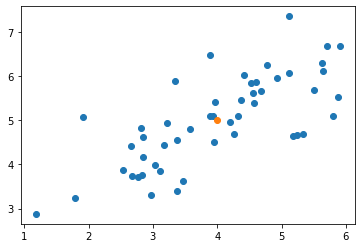

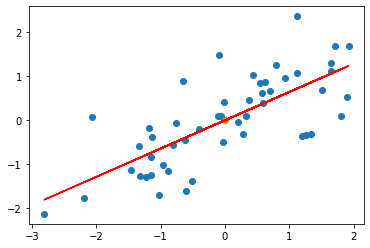

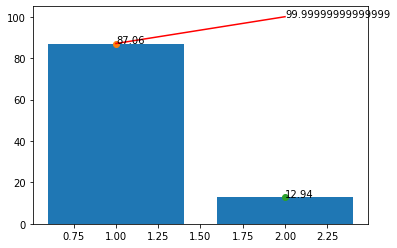

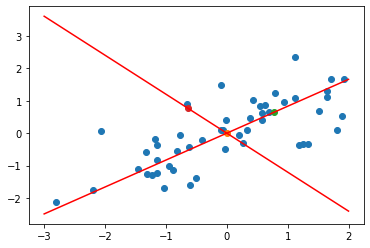

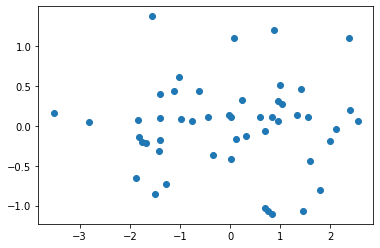

In [183]:
# Task 2: Principal Component Analysis
data = loadmat('data.mat') 
X = data['X']
"""TODO a) visualize as scatter plot
b) Normalize and center the data and then find eigenvalues and eigenvectors.
c) Project data to PCA1 and plot.
d) Compare the result with 'sklearn.decomposition.PCA'""" 
plt.scatter(X[:,0], X[:,1])
xMean, yMean = np.mean(X[:,0]), np.mean(X[:,1])
plt.scatter(xMean, yMean)
plt.show()
for data in X:
    data -= (xMean, yMean)
plt.scatter(X[:,0], X[:,1])
plt.scatter(0,0)
model = sklearn.linear_model.LinearRegression()
intercept = model.fit(X[:,0].reshape(-1, 1), X[:,1]).predict(X[:,0].reshape(-1, 1))
plt.plot(X[:,0].reshape(-1, 1),intercept, "red")
plt.show()
eigenvalues, eigenvectors = np.linalg.eig(np.cov(X.T))
#print(np.dot(np.cov(X.T), eigenvectors[:,0]))
#print(eigenvalues[0] * eigenvectors[:,0])
explainedVariance = []
for value in eigenvalues:
    explainedVariance.append((value / np.sum(eigenvalues))*100)
cumulativeExplainedVariance = np.cumsum(explainedVariance)
plt.bar((1,2), explainedVariance)
plt.plot((1,2), cumulativeExplainedVariance, "red")
plt.annotate(cumulativeExplainedVariance[1], (2,cumulativeExplainedVariance[1]))
for i in range(2):
    x, y = i+1,explainedVariance[i]
    plt.scatter(x, y)
    plt.annotate(f"{y:.2f}", (x, y))
plt.show()
plt.scatter(X[:,0], X[:,1])
#plt.plot(X[:,0].reshape(-1, 1),intercept, "red")
plt.scatter(0,0)
plt.scatter(eigenvectors[0,0], eigenvectors[1,0])
plt.scatter(eigenvectors[0,1], eigenvectors[1,1])
x = np.linspace(-3,2,50)
y = x*(eigenvectors[0,0]/eigenvectors[0,1])
y2 = x*(eigenvectors[1,0]/eigenvectors[1,1])
plt.plot(x,y, "red")
plt.plot(x, y2, "red")
plt.show()
eigenvectors, eigenvalues
T = np.dot(X, eigenvectors)
plt.scatter(T[:,0], T[:,1])

In [241]:
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (int(r), int(g), int(b))

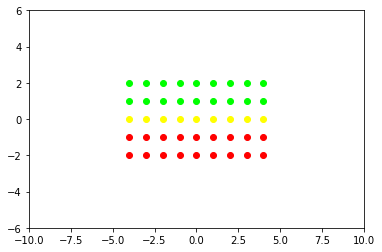

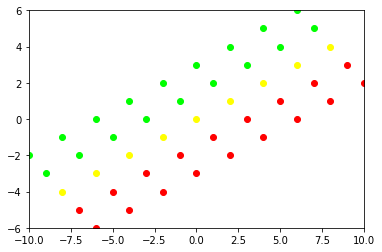

In [252]:
A = np.array([[2,-1],[1,1]])
grid = []
for i in range(-4,5):
    for j in range(-2,3):
        grid.append((i,j))
grid = np.array(grid)
color = []
for point in grid:
    color.append(colorizer(point[0], point[1]))
    plt.scatter(point[0], point[1], color=colorizer(point[0], point[1]))
plt.axis((-10,10,-6,6))
plt.show()
grid2 = np.dot(grid, A.T)
for i, point in enumerate(grid2):
    plt.scatter(point[0], point[1], color=color[i])
plt.axis((-10,10,-6,6))
plt.show()